1.
--

pdf1 mean: 0.5, pdf2 mean: 0.5 일때, AUC 값은 0.505입니다.
pdf1 mean: 0.4, pdf2 mean: 0.6 일때, AUC 값은 0.505입니다.
pdf1 mean: 0.3, pdf2 mean: 0.7 일때, AUC 값은 0.505입니다.


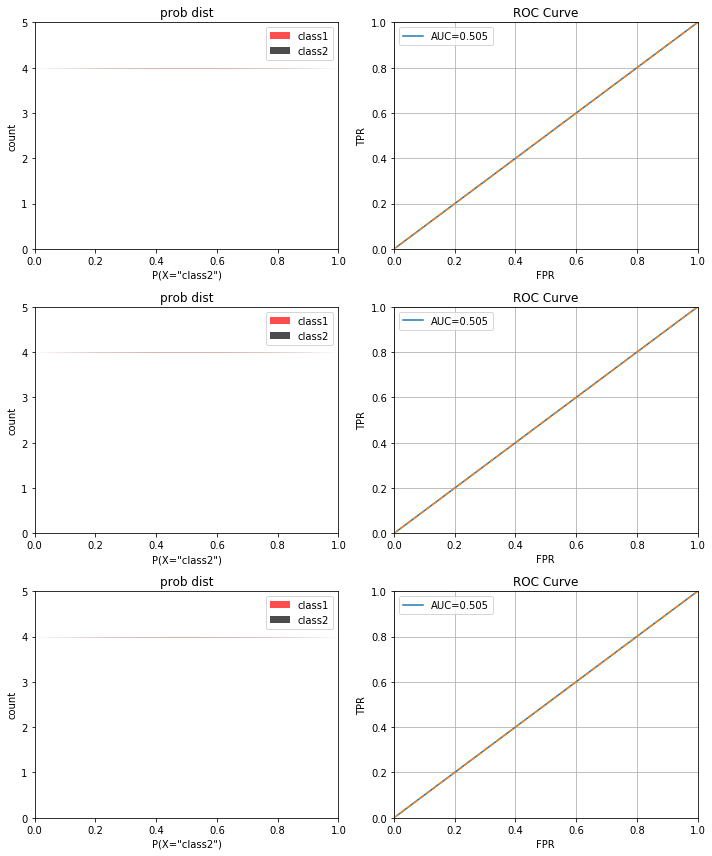

In [20]:
# import numpy as np
import matplotlib.pyplot as plt

# mean, std 값을 이용해 정규분포의 확률밀도 함수(pdf)를 만들어 봅니다.
def pdf(x, mean, std):
    # normalize를 위한 Normal Factor를 계산합니다.
    factor = 1.0 / np.sqrt(2 * np.pi * (std ** 2))

    # TODO: 정규분포의 확률밀도함수(pdf)를 Numpy를 이용하여 만들고 이를 변수 pdf에 저장합니다.
    pdf = factor * np.e ** (-((x-mean)** 2)/2 * (std ** 2))

    return pdf


def plot_pdf(pdf1, pdf2, ax, x=np.linspace(0, 1, num=100)):
    """
    두 개의 pdf를 이용해 그래프를 그리는 함수입니다.
    """
    ax.fill(x, pdf1, "r", alpha=0.7)
    ax.fill(x, pdf2, "k", alpha=0.7)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 5])
    ax.set_title("prob dist")
    ax.set_ylabel('count')
    ax.set_xlabel('P(X="class2")')
    ax.legend(["class1", "class2"])


# 두 개의 pdf에서 변화하는 Threshold에 따라 ROC그래프를 형성하는 함수를 만들어 봅니다.
def plot_roc(pdf1, pdf2, ax, x=np.linspace(0, 1, num=100)):
    # pdf1과 pdf2 각각의 합(면적)을 구합니다. 
    total_pdf1 = sum(pdf1)
    total_pdf2 = sum(pdf2)

    C_TP, C_FP = 0, 0
    TPRs, FPRs = [], []

    # Iteratre through all values of x
    for i in range(len(x)):
        # We are only interested in non-zero values of bad
        if pdf2[i] > 0:
            C_TP += pdf2[len(x) - 1 - i]
            C_FP += pdf1[len(x) - 1 - i]

        # ToDo : FPR을 계산합니다.
        FPR = C_FP / total_pdf1

        # ToDo : TPR을 계산합니다.
        TPR = C_TP / total_pdf2

        # TPR_list와 FPR_list에 계산한 값을 넣습니다.
        TPRs.append(TPR)
        FPRs.append(FPR)

    # ToDo: AUC값을 계산합니다.(threshold step이 100개임을 이용하세요.) 
    auc = np.sum(TPRs) / 100
    auc = round(auc, 3)

    # ROC Curve를 그리고 저장합니다.
    ax.plot(FPRs, TPRs)
    ax.plot(x, x, "--")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title("ROC Curve")
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.grid()
    ax.legend(["AUC=%.3f" % auc])

    return auc


def main():
    x = np.linspace(0, 1, num=100)
    fig, ax = plt.subplots(3, 2, figsize=(10, 12))

    # pdf의 형성에 사용할 값들입니다.
    means_tuples = [(0.5, 0.5), (0.4, 0.6), (0.3, 0.7)]

    idx = 0

    # 여러가지 경우에 대해 ROC Curve를 그립니다.
    for pdf1_mean, pdf2_mean in means_tuples:
        pdf1 = pdf(x, pdf1_mean, 0.1)
        pdf2 = pdf(x, pdf2_mean, 0.1)
        plot_pdf(pdf1, pdf2, ax[idx, 0])
        auc = plot_roc(pdf1, pdf2, ax[idx, 1])
        print('pdf1 mean: {}, pdf2 mean: {} 일때, AUC 값은 {}입니다.'.format(pdf1_mean, pdf2_mean, auc))
        idx += 1

    plt.tight_layout()
    plt.savefig('pictures/roc_curve2.png')


if __name__ == "__main__":
    main()

2.
---

In [15]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_file) :
    img = Image.open(image_file)
    img.load()
    data = np.asarray(img, dtype="int32")
    
    return data
    
def init_centroids(image, k):
    """
    k개의 centroid를 임의로 생성합니다.
    """
    m, n = image.shape
    centroids = np.zeros((k, n))
    
    np.random.seed(2019)
    # idx는 m 개의 데이터 포인트 중 k 개를 임의로 뽑기 위한 인덱스를 저장합니다.
    # m개의 점 중 k개의 클러스터를 추출함(인덱스)
    idx = np.random.randint(0, m, k)
    
    # ToDO: 하나의 centroid를 reshape된 차원에서 임의의 한 점으로 초기화합니다.
    # 클러스터의 위치 지정
    for i in range(k):
        centroids[i, :] = image[idx[i], :]
    
    return centroids
    
def find_closest_centroids(image, centroids):
    """
    reshape된 차원의 각 데이터 포인트에서 가장 가까운 centroid가 있는 클러스터의 index를 구합니다.
    즉, 현재 centroid에서 새로운 클러스터를 찾습니다.
    """
    # m은 reshape된 차원에서 데이터 포인트의 개수
    # k는 클러스터의 개수, idx는 각 데이터 포인트가 속하게 될 클러스터의 인덱스를 저장합니다.
    # idx는 numpy array로 초기화하는 코드를 작성합니다.
    m = image.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            # ToDO: 현재 다루고 있는 데이터 포인트와 centroid간의 거리를 구합니다.
            dist = np.sum((image[i, :] - centroids[j, :]) ** 2)
            
            # ToDO: 현재까지의 최소 거리인지 확인하고 최소 거리를 업데이트합니다.
            # 최소 거리를 업데이트 하는 코드를 작성해주세요.
            if dist < min_dist:
                min_dist = dist
                idx[i] = j # i번째 인덱스의 요소의 소속 클러스터는 j가 된다
    
    return idx
    
def compute_centroids(image, idx, k):
    """
    새로 찾아낸 클러스터의 centroid를 구합니다.
    """
    m, n = image.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        # ToDO: i 번째 클러스터에 속한 데이터 포인트들을 모두 찾습니다.
        # numpy의 where 함수를 참조하세요.
        indices = np.where(idx == i)
        
        # ToDO: 클러스터의 centroid는 클러스터 속에 속한 모든 데이터 포인트의 평균 지점입니다.
        # 클러스터 위치를 업데이트 시켜줌
        centroids[i, :] = (np.sum(image[indices, :], axis=1) / len(indices[0])).ravel()
    
    return centroids
    
def run_k_means(image, initial_centroids, max_iters):
    """
    K-means 알고리즘을 실행합니다.
    
    inital_centroids: 초기에 랜덤하게 지정된 centroids
    max_iters: K-means 알고리즘의 최대 반복 횟수
    """
    m, n = image.shape
    
    # ToDO: k는 클러스터 개수입니다.
    k = initial_centroids.shape[0]
    
    # ToDO: find_closest_centroids() 함수의 idx와 같습니다.
    idx = np.zeros(m)
    
    centroids = initial_centroids
    
    for i in range(max_iters):
        # ToDO: 가장 가까운 centroid를 다시 찾아서 새로운 cluster를 생성합니다.
        idx = find_closest_centroids(image, centroids)
        
        # ToDO: 새로운 클러스터를 기반으로 centroid를 업데이트합니다.
        centroids = compute_centroids(image, idx, k)
    return centroids
    
def plot_reduced_image(image_reducued):
    print('=' * 20, '압축된 이미지', '=' * 20)
    plt.imsave('kmeans_reducued_image.png', image_reducued)
#     elice_utils.send_image('kmeans_reducued_image.png')

def main():
    # 원본 이미지를 출력합니다.
    print('=' * 20, '원본 이미지', '=' * 20)
    print()
    
    # 이미지를 numpy array로 불러옵니다.
    image = load_image('lenna.png')
    
    # K-means 알고리즘에 적용하기 위해 image 값의 범위를 정규화 하고 reshape을 거칩니다.
    # 이미지는 image.shape[2] 만큼의 차원 상에 있는 점들의 집합으로 생각할 수 있습니다.
    image = image / 255
    image_reshape = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2]))
    
    # ToDO: Cetroid를 임의로 초기화합니다.
    # init_centroids 함수를 수정하세요.
    num_clusters = 16
    initial_centroids = init_centroids(image_reshape, num_clusters)

    # ToDO: K-means 알고리즘을 실행합니다.
    # run_k_means 함수를 수정하세요.
    centroids = run_k_means(image_reshape, initial_centroids, 10)

    # ToDO: K-means를 통해 구해낸 클러스터 중 각 데이터 포인트가 속한 클러스터를 구합니다.
    idx = find_closest_centroids(image_reshape, centroids)
    
    #####################################################################################
    # 구현이 끝났다고 판단되면 아래 코드의 주석을 해제해서 결과를 확인하세요.

    # 각 픽셀 값을 centroid 값으로 대체해서 압축된 이미지를 생성합니다.
    image_reducued = centroids[idx.astype(int), :]
    
    # 복원된 이미지를 원래 이미지의 모양으로 reshape 시킵니다.
    image_reducued = np.reshape(image_reducued, (image.shape[0], image.shape[1], image.shape[2]))
    
    # 결과 이미지를 그려냅니다.
    plot_reduced_image(image_reducued)

if __name__ == "__main__":
    main()

==================== 원본 이미지 ====================

==================== 압축된 이미지 ====================
